In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
#matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

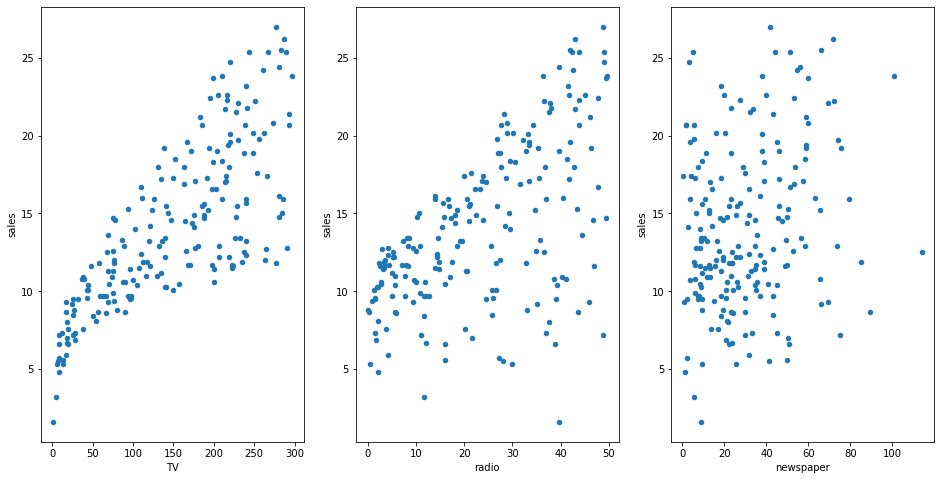

In [6]:
#Visualise the relationship between features and label using scatter plot
fig,axs = plt.subplots(1,3)
data.plot(kind= 'scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind= 'scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind= 'scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

In [7]:
#create x = feature and y = label
x = data[['TV']]
y = data.sales

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [8]:
print(lm.intercept_)

7.032593549127693


In [9]:
print(lm.coef_)

[0.04753664]


In [11]:
7.03 + 0.04 * 50


9.030000000000001

In [12]:
x_new = pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [13]:
lm.predict(x_new)

array([9.40942557])

In [15]:
# print P values for model coefficients

import statsmodels.formula.api as smf
lm = smf.ols(formula='sales~TV',data=data).fit()
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [16]:
# P value > 0.05 Means there is relationship b/w sales and TV advertisement. 

In [17]:
#print R sqaure for this model

lm.rsquared

0.611875050850071

In [18]:
#40 % risk chances in above model

In [19]:
#Multiple Linear Regression- y= c+m1*TV+m2*Radio+m3*Newspaper

x = data[['TV','radio','newspaper']]
y= data.sales
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [20]:
print('Intercept:',lm.intercept_)
print('TV:',lm.coef_[0])
print('radio:',lm.coef_[1])
print('Newspaper:',lm.coef_[2])

Intercept: 2.9388893694594067
TV: 0.04576464545539761
radio: 0.18853001691820462
Newspaper: -0.0010374930424762972


In [21]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.58e-96
Time:                        17:47:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Checking model confidence. Only include TV and Radio 

lm = smf.ols(formula='sales ~ TV + radio',data=data).fit()
lm.rsquared

0.8971942610828957

In [24]:
#Include TV,Radio and Newspaper

lm = smf.ols(formula='sales ~ TV + radio',data=data).fit()
lm.rsquared

0.8971942610828957

In [25]:
# Project_1-Linear Regression
#features-GRE Score,TOEFL Score,University rating,SOP,LOR,CGPA,Research
#label- Chance of Admit


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [7]:
data.shape

(500, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [9]:
#Understand data at high level.Check statistics of data set

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [11]:
#Fill the null value
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [36]:
#Verify if Nan value been filed 
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
#Dropping unwanted column

data = data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


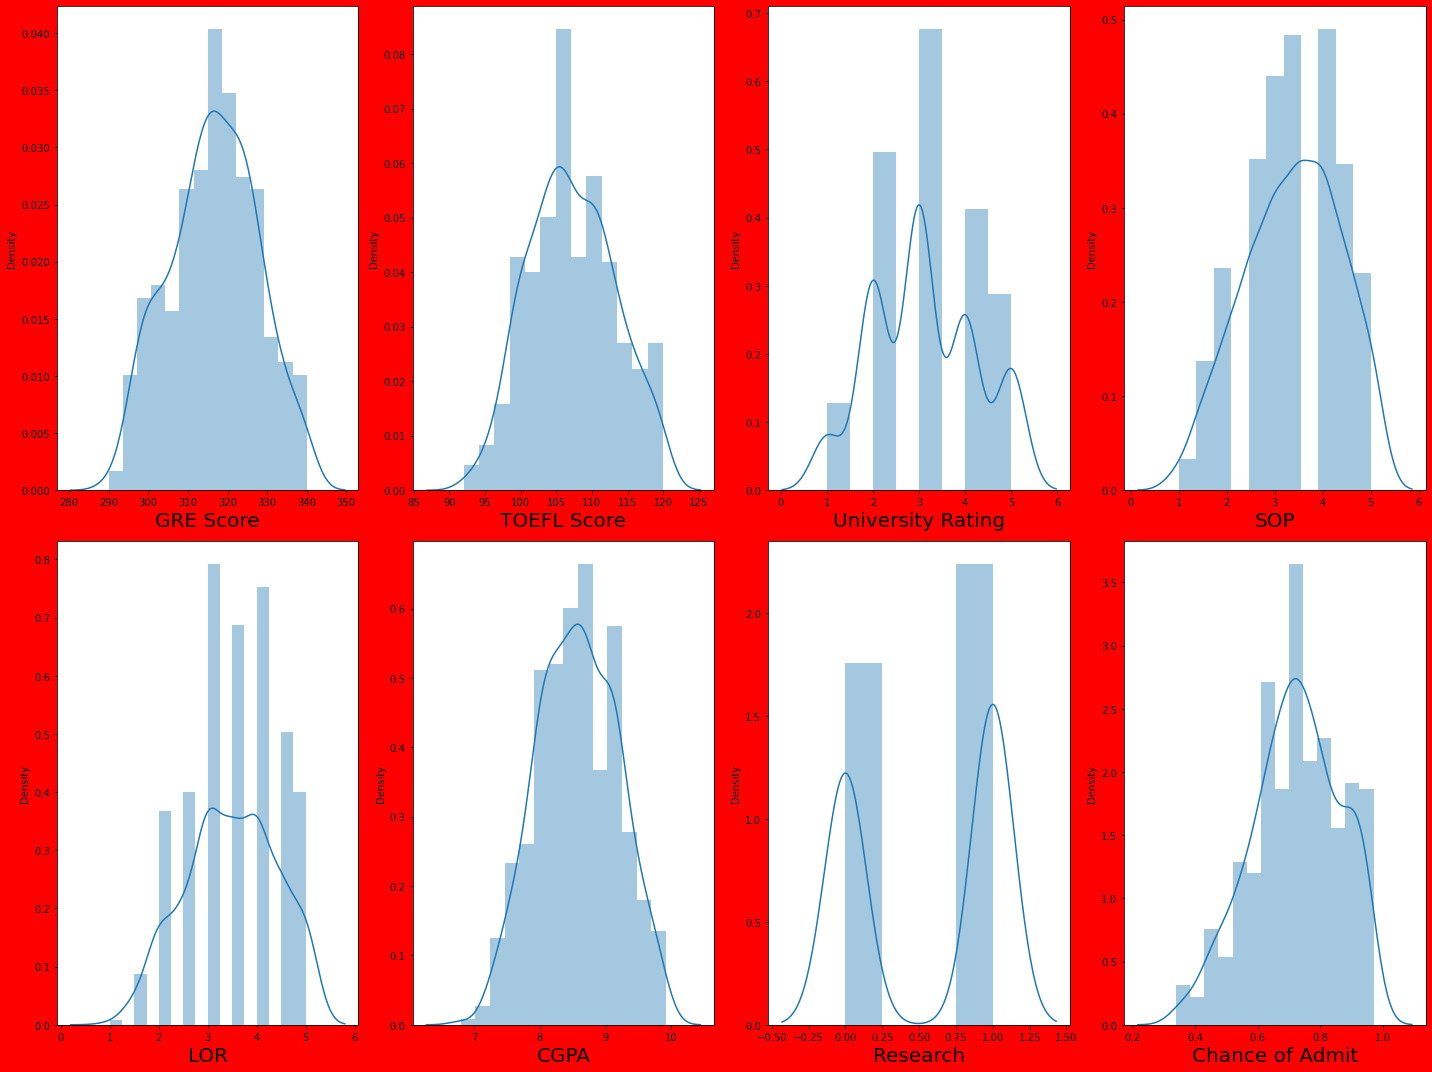

In [14]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1
for column in data:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()    
        

In [16]:
#divide dataset into feature and label

y = data['Chance of Admit']
x = data.drop(columns = ['Chance of Admit'])

In [17]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


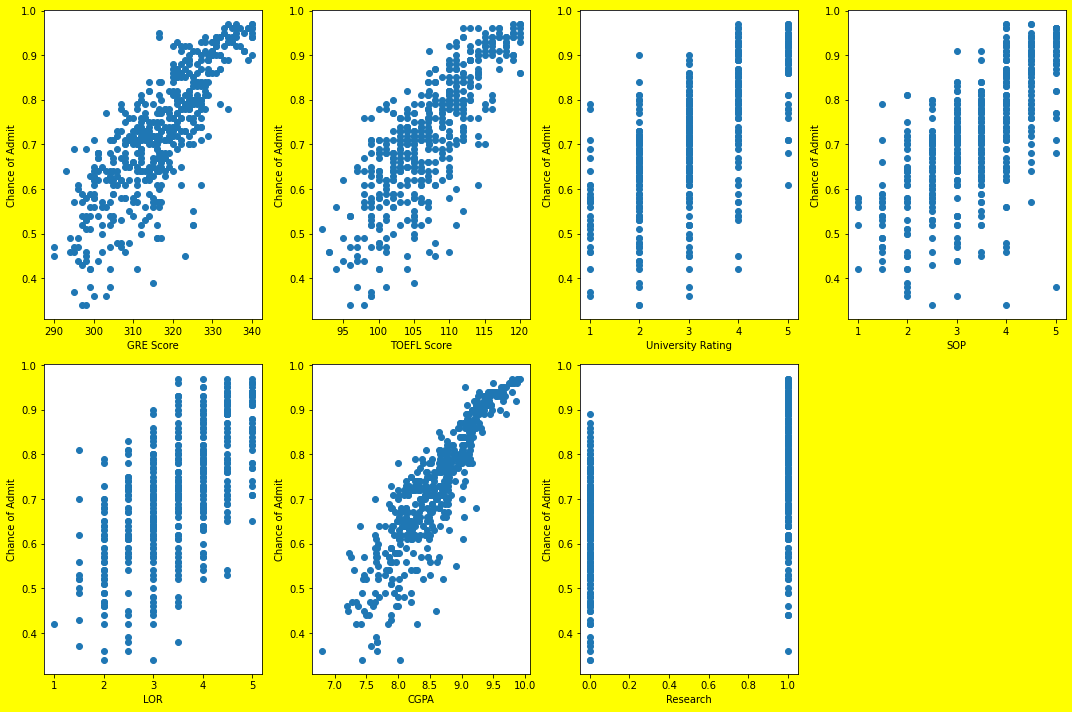

In [18]:
#Visulising relationship
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber = 1
for coloumn in x:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[coloumn],y)
        plt.xlabel(coloumn,fontsize=10)
        plt.ylabel('Chance of Admit')
        
    plotnumber+=1
    
plt.tight_layout()

In [19]:
#Data Scaling, z= X-mean/std

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [36]:
#split data into train & test.Model will be bulit on training data and tested on test data

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=35)
y_train.head()

470    0.87
247    0.71
66     0.61
82     0.92
491    0.54
Name: Chance of Admit, dtype: float64

In [37]:
#Model instantiating and training
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [23]:
#prdicting the chance of admission given

data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [24]:
#we have alreday fit the scaler,we can transform the data

print('chance of admission ', regression.predict(scaler.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]])))

chance of admission  [0.70322695]


In [25]:
#Saving the modelfor sharing and later used for prdiction

filename = 'finalised_model.pickle'
pickle.dump(regression,open(filename,'wb'))

#prdiction using saved model

loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))
a

array([0.62267826])

In [38]:
#adjusted R square
regression.score(x_train,y_train)

0.8209074634338202

In [27]:
#lets check how well model fits test data

regression.score(x_test,y_test)

0.8158536032987508

In [29]:
#lets plot and visualise

y_predict = regression.predict(x_test)
y_predict

array([0.58314438, 0.75070147, 0.83596128, 0.57705542, 0.70650543,
       0.63546297, 0.64519139, 0.66647511, 0.67316678, 0.4973506 ,
       0.97334899, 0.61793688, 0.62313079, 0.77173628, 0.69688105,
       0.69178088, 0.60675728, 0.82237514, 0.82870747, 0.51953256,
       0.68930146, 0.5550168 , 0.64879375, 0.88246546, 0.7366568 ,
       0.93176483, 0.66105361, 0.53989472, 0.73960489, 0.84196483,
       0.72693715, 0.70601197, 0.88446715, 0.64032929, 0.55276973,
       0.42431795, 0.6883366 , 0.9127983 , 0.95803419, 0.72100952,
       0.60663503, 0.8153943 , 0.62409509, 0.77473815, 0.73132642,
       0.62493373, 0.71141173, 0.72870992, 0.92133807, 0.69718646,
       0.78857222, 0.52922397, 0.78721804, 0.78601717, 0.90914545,
       0.68228025, 0.95252323, 0.62378257, 0.78858903, 0.54691838,
       0.65748978, 0.8292067 , 0.95225449, 0.79180823, 0.85008844,
       0.91032719, 0.93672814, 0.78753852, 0.80282202, 0.58158952,
       0.71628774, 0.71724057, 0.73305022, 0.77491311, 0.48907

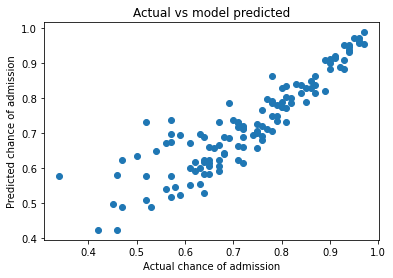

In [30]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual vs model predicted')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [32]:
y_predict = regression.predict(x_test)

In [33]:
mean_absolute_error(y_test,y_predict)

0.0429626976739571

In [34]:
mean_squared_error(y_test,y_predict)

0.003621141956466843

In [35]:
np.sqrt(mean_squared_error(y_test,y_predict))

0.06017592505700966

In [39]:
#Ridge and Lasso

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lasscv = LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [41]:
#best alpha parameter

alpha = lasscv.alpha_
alpha

6.417432411805146e-06

In [42]:
#we know alpha, now use lasso regression
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.417432411805146e-06)

In [43]:
lasso_reg.score(x_test,y_test)

0.8158605500261961

In [45]:
#Now use Ridge Regression-RidgeCV will return best apha after performing 10 cross validation

ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [46]:
ridgecv.alpha_

0.011

In [47]:
ridge_reg = Ridge(alpha=ridgecv.alpha_)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.011)

In [48]:
ridge_reg.score(x_train,y_train)

0.8209074627605364